### Agenda
- Exploratory Data Analysis and Data Preprocessing.
- Machine Learning; Model Building and Evaluation.

### EDA 
- Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.
- It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data

### Data Preprocessing
-  Data Preprocessing focuses on processing the data and making it suitable for the model.

- Before building any machine learning model it is crucial to perform data preprocessing to feed the correct data to the model to learn and predict. Model performance depends on the quality of data feeded to the model to train.

- It involves various steps like 
  - Handling duplicates
  - Handling missing values
  - Handling outliers
  - Handling garbage data, incorrect or invalid data 
  - Changing data types 
  - Converting features into numerical data type
  - Standardizing and normalising the data
  - Making transformations of variables as needed - log tranformation, power transformation etc 

- These are some of the common steps. But most of these data preprocessing steps depend on case to case basis.

### Domain: Marketing

### Problem Statement
You're a marketing analyst and you've been told by the Senior Marketing Manager that recent
marketing campaigns have not been as effective as they were expected to be. You need to analyze
the data set in order to understand this problem and propose data-driven solutions. You are required
to solve the following questions to generate a report for your management.

### Machine Learning Objective
- The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.
- A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

### Data Description.
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location

### 1. Import necessary packages

In [139]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### 2. Load the dataset and display 5 samples

In [140]:
df = pd.read_csv("marketing_data.csv")

In [141]:
df.sample(5)

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1135  9904        1956  Graduation        Married  $71,391.00         0   
566   2535        1978      Master        Married  $88,097.00         1   
683   6312        1959  Graduation        Married  $65,031.00         0   
126   2404        1976  Graduation        Married  $53,359.00         1   
98    8601        1980  Graduation        Married  $80,011.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1135         1     3/29/13       50       336        123              274   
566          0     8/18/12       24       163          0              480   
683          1     3/17/13       29       258        107              291   
126          1     5/27/13        4       173          4               30   
98           1     4/29/13        3       421         76              536   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1135               46               123           141                  5   
566                 0               126            75                  1   
683                84                37            86                  4   
126                 3                 6            41                  4   
98                 82               178           102                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1135                6                    5                 12   
566                 6                    5                  8   
683                10                    3                 13   
126                 5                    1                  4   
98                  8                    6                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1135                  3             0             0             0   
566                   9             0             1             1   
683                   7             0             0             0   
126                   7             0             0             0   
98                    4             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  
1135             0             0         0         0      CA  
566              1             0         1         0      SP  
683              0             0         0         0     GER  
126              0             0         0         0      US  
98               0             0         0         0     AUS

## EDA & Data Preprocessing

### 3. Check the info of the data and write your findings

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- There a total of 28 columns and 2240 rows.
- Most of the columns are integer type.
- Object type features:- 'Education','Marital_status', 'Income', 'Dt_customer' and 'Country'

### 4. Check the following.
- Check how spread out or varied your data set is.
- Check where the middle 50% of your data lies.
- Check boundaries for the lowest, middle and upper quarters of data.



In [143]:
df.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Response     Complain  
count  2240.000000  2240.000000  
mean      0.149107     0.009375  
std       0.356274     0.096391  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

In [144]:
df.describe(include='O')

Education Marital_Status     Income  Dt_Customer Country
count         2240           2240        2216        2240    2240
unique           5              8        1974         663       8
top     Graduation        Married  $7,500.00      8/31/12      SP
freq          1127            864          12          12    1095

- We can see that there are 5 types of education
- Income is a continuous feature but we need to remove the dollar sign and make it a numerical column
- There are 8 unique countries

### 5. Check for any missing values in the dataset and How will you handle them?

In [145]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64

Since we have missing values in the feature Income about 1%, which is very less. lets drop those missing values.

In [146]:
## Dropping null values.
df.dropna(inplace=True)
df.shape

(2216, 28)

### 6. Check for any presence of Special characters in any variables. If present clean/replace and change the datatype of the variable if required.

In [147]:
df[' Income '] = df[' Income '].str.replace('$','').str.replace(',','')

In [148]:
df[' Income '] = df[' Income '].astype(float)

### 7. Marketing Manager wants to know the 'Age'  of the customers. How will u extract the feature age from the given dataset?

In [149]:
df.head(2)

ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0  1826        1970  Graduation       Divorced   84835.0        0         0   
1     1        1961  Graduation         Single   57091.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     6/16/14        0       189        104              379              111   
1     6/15/14        0       464          5               64                7   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   

  Country  
0      SP  
1      CA

In [150]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2022-x)

In [151]:
df['Age']

0       52
1       61
2       64
3       55
4       33
        ..
2235    46
2236    45
2237    46
2238    44
2239    53
Name: Age, Length: 2216, dtype: int64

### 8. Marketing manager wants to understand the total amount spent on various products so that we can find what percentage of amount is spent on which product. (for each customer)

In [152]:
df.head()

ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     6/16/14        0       189        104              379              111   
1     6/15/14        0       464          5               64                7   
2     5/13/14        0       134         11               59               15   
3     5/11/14        0        10          0                1                0   
4      4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  Age  
0      SP   52  
1      CA   61  
2      US   64  
3     AUS   55  
4      SP   33

In [153]:
# REGEX: ---- Regular expressions are a powerful language for matching text patterns
df['Total_amount_spent'] = np.sum(df.filter(regex='Mnt'), axis=1)

In [154]:
## Percentage of the amount spent on Wines in Total_amount_spent.
df['MntWines']/df['Total_amount_spent']*100

0       15.882353
1       80.415945
2       53.386454
3       90.909091
4        6.593407
          ...    
2235    53.991292
2236     9.090909
2237    59.870550
2238    19.305857
2239    15.677180
Length: 2216, dtype: float64

In [155]:
## Percentage of the amount spent on Gold Products in Total_amount_spent.
df['MntGoldProds']/df['Total_amount_spent']*100

0       18.319328
1        6.412478
2       11.952191
3        0.000000
4       37.362637
          ...    
2235    11.320755
2236    29.090909
2237     4.530744
2238     4.555315
2239    13.358071
Length: 2216, dtype: float64

In [156]:
## Percentage of the amount spent on Gold Products in Total_amount_spent.
df['MntMeatProducts']/df['Total_amount_spent']*100

0       31.848739
1       11.091854
2       23.505976
3        9.090909
4       26.373626
          ...    
2235    18.287373
2236    23.636364
2237    28.478964
2238    50.686913
2239    51.298701
Length: 2216, dtype: float64

### 9. Being an Analyst understand the total number of purchases made through different channels which can help find the percentage these channels contribute.

In [157]:
df['TotalPurchases'] = np.sum(df.filter(regex='Purchases'),axis=1)

In [158]:
## Percentage of the NumdealsPurchases contribution to the TotalPurchases.
df['NumDealsPurchases']/df['TotalPurchases']*100

0        6.666667
1        5.555556
2        9.090909
3       25.000000
4       25.000000
          ...    
2235    10.000000
2236    20.000000
2237    14.285714
2238     5.000000
2239     5.555556
Length: 2216, dtype: float64

In [159]:
## Percentage of the store Purchases contribution to the TotalPurchases.
df['NumStorePurchases']/df['TotalPurchases']*100

0       40.000000
1       38.888889
2       45.454545
3       50.000000
4       25.000000
          ...    
2235    55.000000
2236    60.000000
2237    35.714286
2238    50.000000
2239    22.222222
Length: 2216, dtype: float64

In [160]:
## Percentage of Catalog purchases contribution to the TotalPurchases.
df['NumCatalogPurchases']/df['TotalPurchases']*100

0       26.666667
1       16.666667
2       18.181818
3        0.000000
4       12.500000
          ...    
2235    10.000000
2236     0.000000
2237     7.142857
2238    20.000000
2239    27.777778
Length: 2216, dtype: float64

### 10. Find which marketing campaign is most successful? use suitable graphs for visualization

In [161]:
cmp = df.filter(regex='Cmp').sum()
cmp

AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    162
AcceptedCmp1    142
AcceptedCmp2     30
dtype: int64

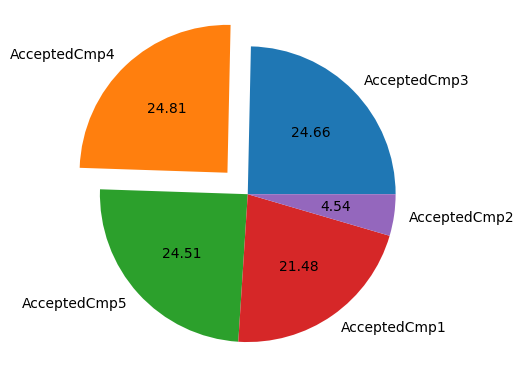

In [162]:
plt.pie(cmp,autopct='%0.2f',labels=cmp.index,explode=[0,0.2,0,0,0])
plt.show()

##### *Campaign 4 has been the most successful with a small margin following Campaign 3 and 5.*

### 11. Plot a Graph and analyze which products are performing the best and which are performing the least in terms of revenue generated?

In [163]:
products = df.filter(regex='Mnt').sum()
products

MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64

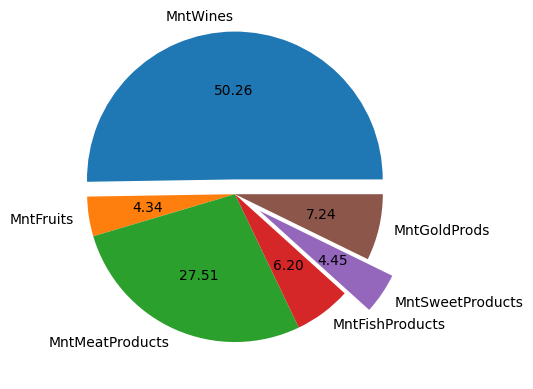

In [164]:
plt.pie(products,autopct='%0.2f',labels=products.index,explode=[0.1,0,0,0,0.2,0])
plt.show()

##### Wine is the best performing product in terms of revenue generated. It contributes to ~50% of the total revenues and Fruit products are least performing product.

### 12. Plot a suitable graph to visualize the distribution of the feature age with respect to customers who accepted the last  Campaign.

In [165]:
customers_accepted = df[df['Response']==1]

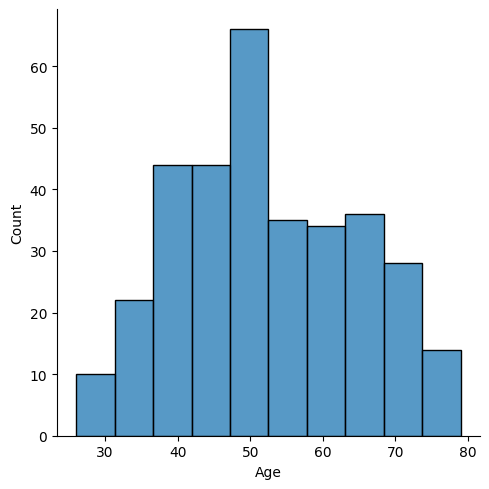

In [166]:
sns.displot(customers_accepted['Age'])
plt.show()

###  13. The Chief Marketing specialist wants to visually see that Which Country has the most number of customers who accepted the last campaign. What is your approach?

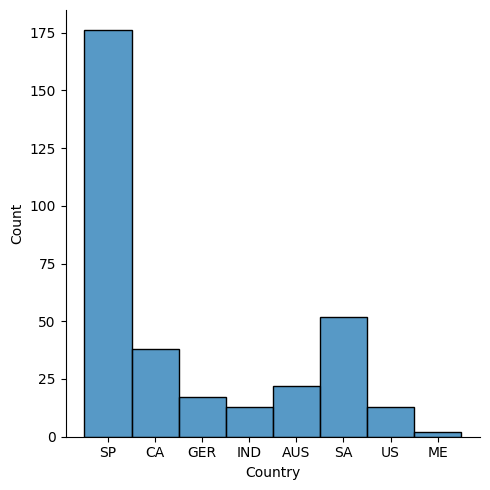

In [167]:
sns.displot(customers_accepted['Country'])
plt.show()

##### Spain is having the most number of customers who accepted the last campaign.

### 14. Analyse visually and write your inferences about the relationship between the following:-
- i) Total amount spent Vs Dependents.  (Dependents=['Kidhome']+['Teenhome'])
- ii) Total Purchases Vs Dependents.

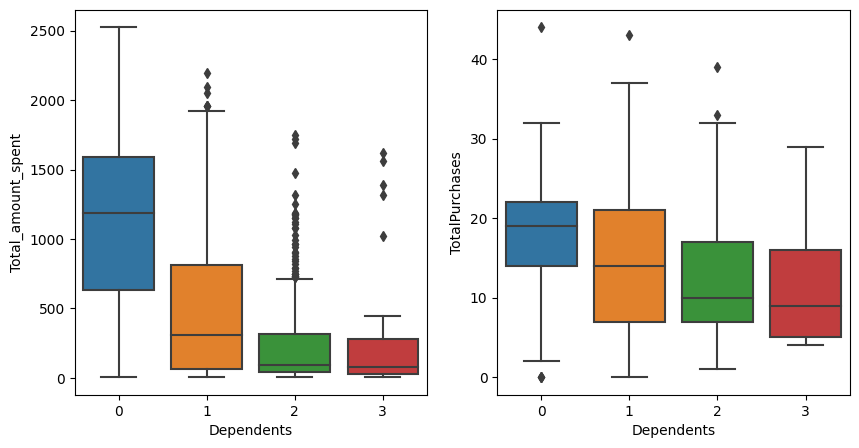

In [168]:
df["Dependents"] = df["Kidhome"] + df["Teenhome"]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Total_amount_spent"],x=df["Dependents"])
plt.subplot(1,2,2)
sns.boxplot(y=df["TotalPurchases"],x=df["Dependents"])
plt.show()

##### Inference
- As we can analyse that customers with more dependents spend less, as compared to customers with less dependents.
- The Customers with more dependents make less number of purchases in the store.

### 15. Perform Correlation Analysis and write your key inferences.

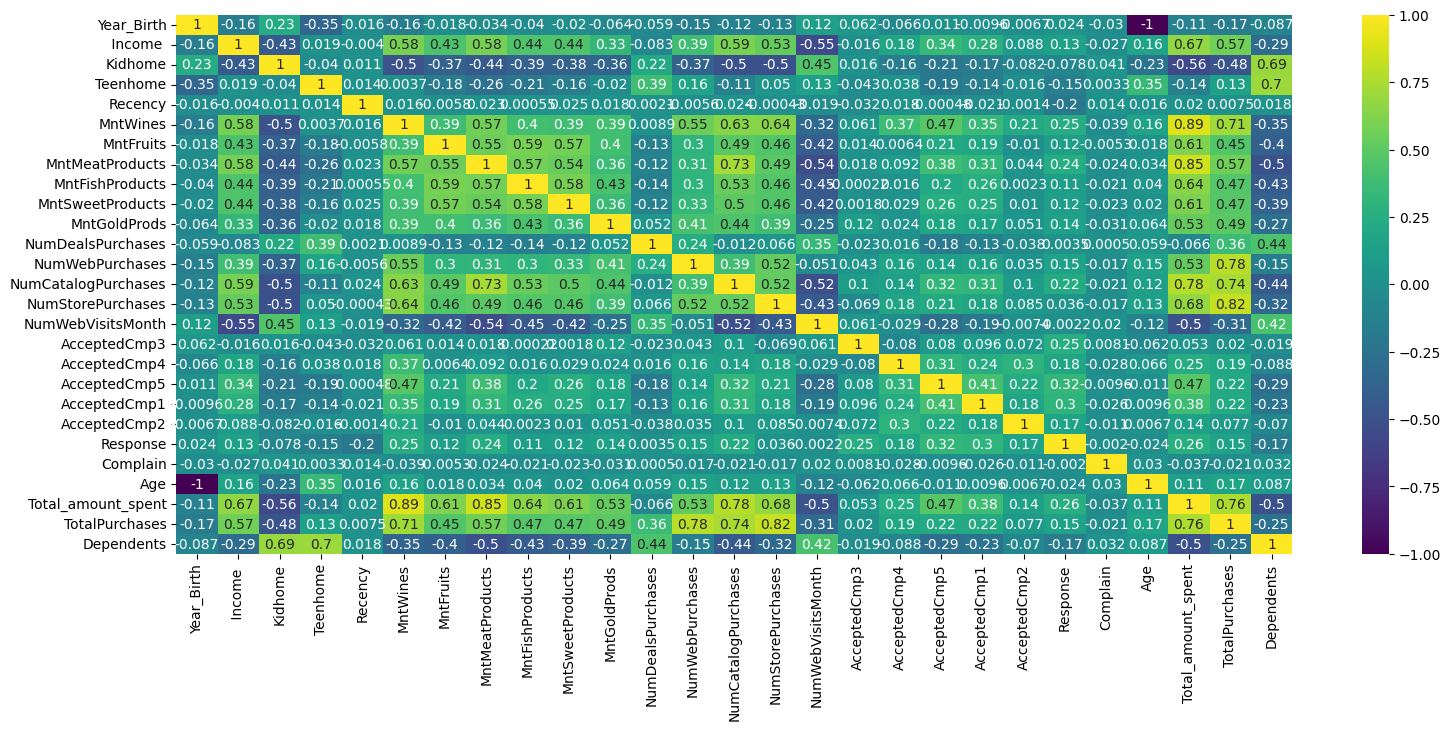

In [169]:
dff = df.drop('ID',axis=1)

plt.figure(figsize=[18,7])
sns.heatmap(dff.corr(),annot=True,cmap='viridis')
plt.show()

##### Inference
- "Amount Spent on Wines" has a high positive correlation with "NumCatalogPurchases" and "NumStorePurchases", and similarly, "Amount Spent on Meat products" has a very high positive correlation with "NumCatalogPurchases",Hence we can analyse that People generally buy Wines and Meat products through Catalogs.
- Income has a high positive correlation with "NumPurchases" column. This represents customers with high income spend more and purchase more frequently.
- Income has a high negative correlation with "NumWebVisitsMonth" and high positive correlation with 'NumStorePurchases'suggesting that customers with high income do not purchase through web visits too often, they purchase more often from the stores.

### 16. Find and Understand the Education background of the customers who complained in the last 2 years.
- State the Education background of the customers who have registered the most complaints.

In [170]:
complain_edu = df[df['Complain']==1]

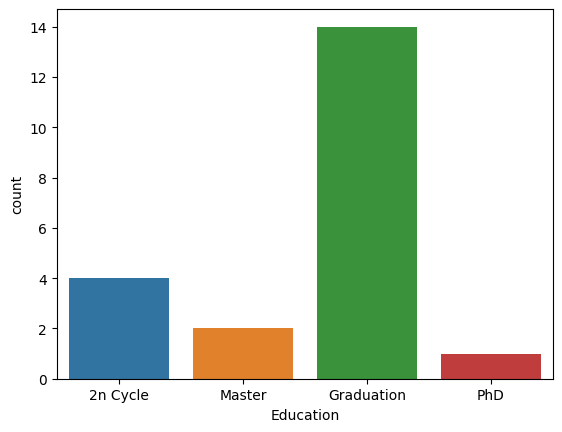

In [171]:
sns.countplot(complain_edu['Education'])
plt.show()

##### The Customers having Graduation level education has registered the most number of complaints among all the other levels of education.

### 17. Use features 'Total_amount_spent', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' and, 'MntGoldProds'.
- i) Plot a pairplot with hue as Response.
- ii) Plot a pairplot with hue as Education.
- iii) Plot a pairplot with hue as Marital Status and write your key observations.

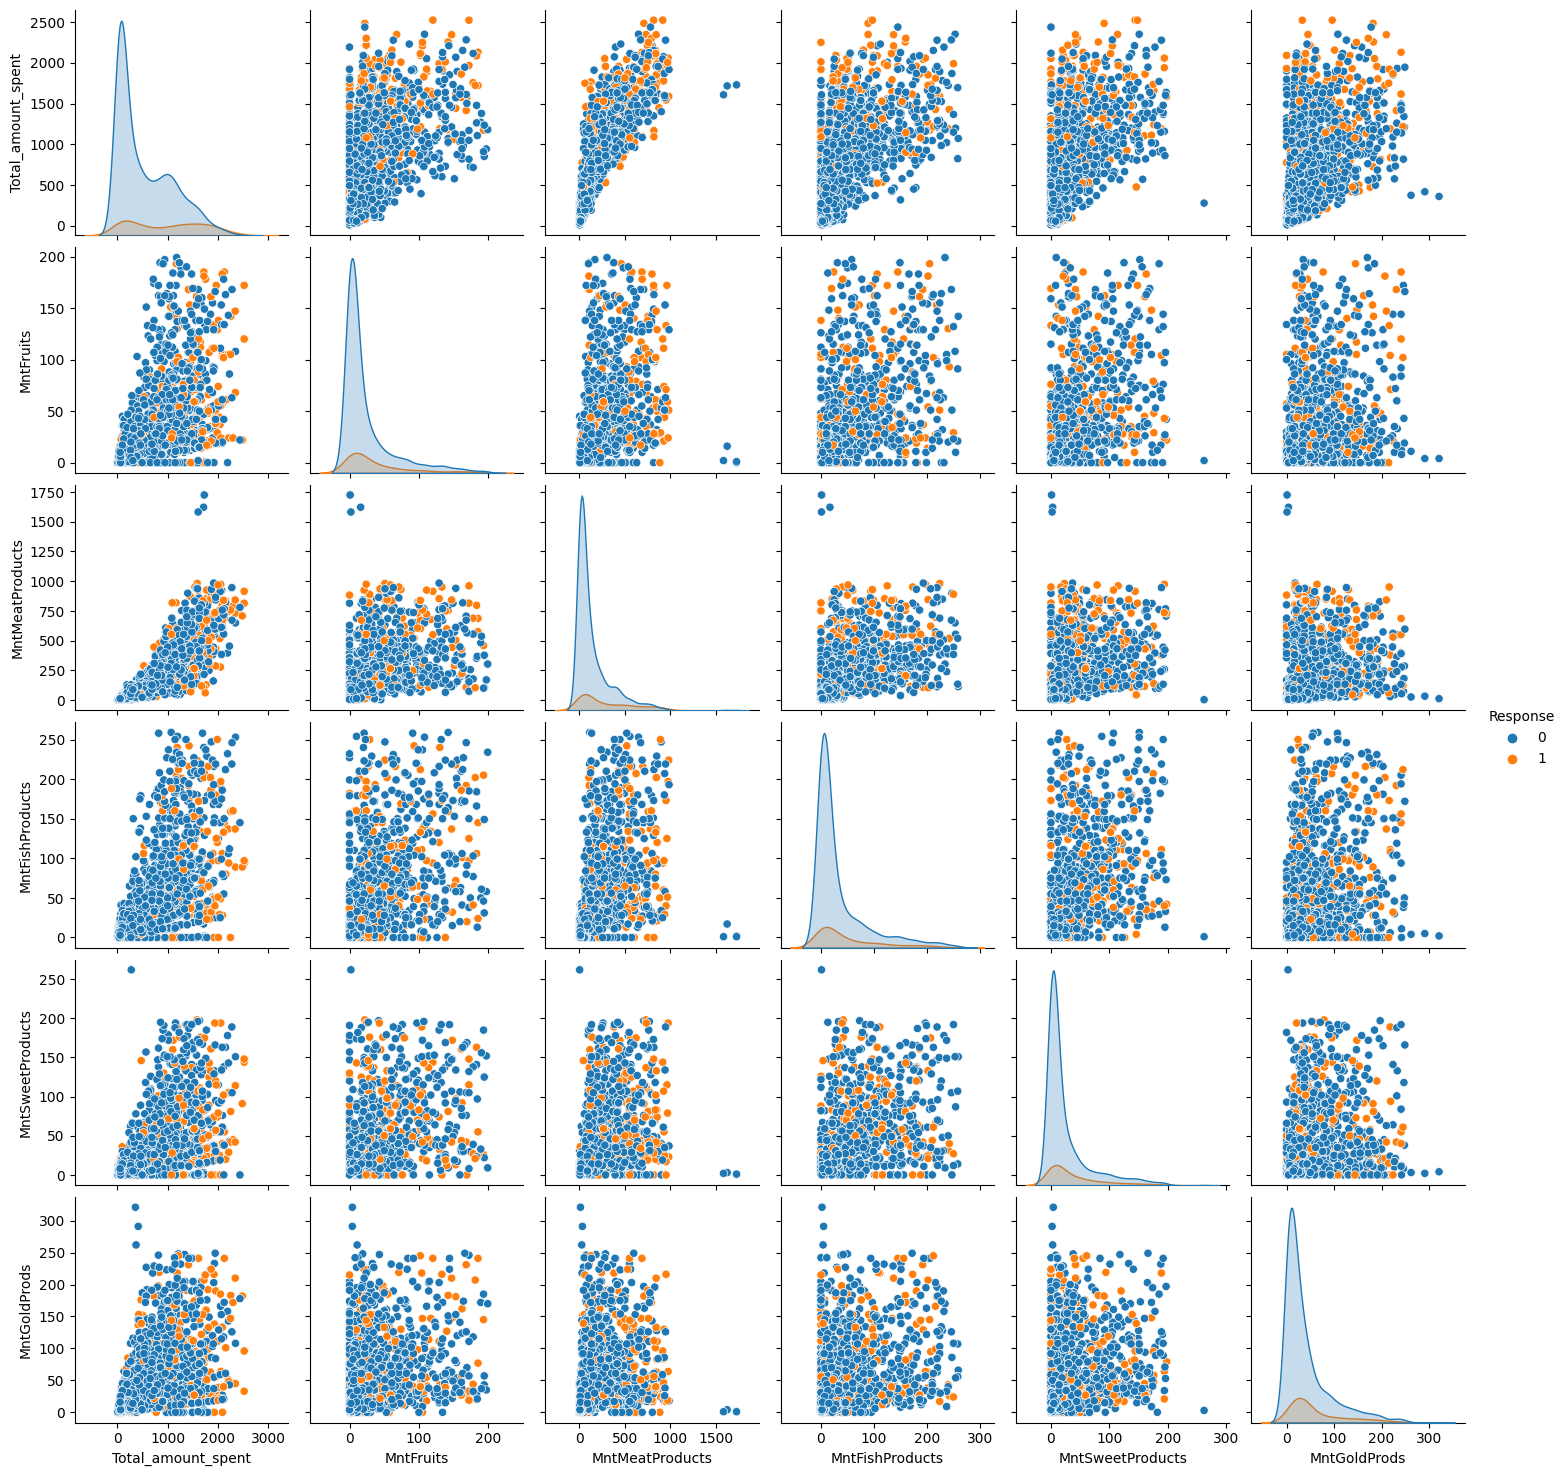

In [109]:
sns.pairplot(df,hue='Response',x_vars=['Total_amount_spent','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'],
                                y_vars=['Total_amount_spent','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'])

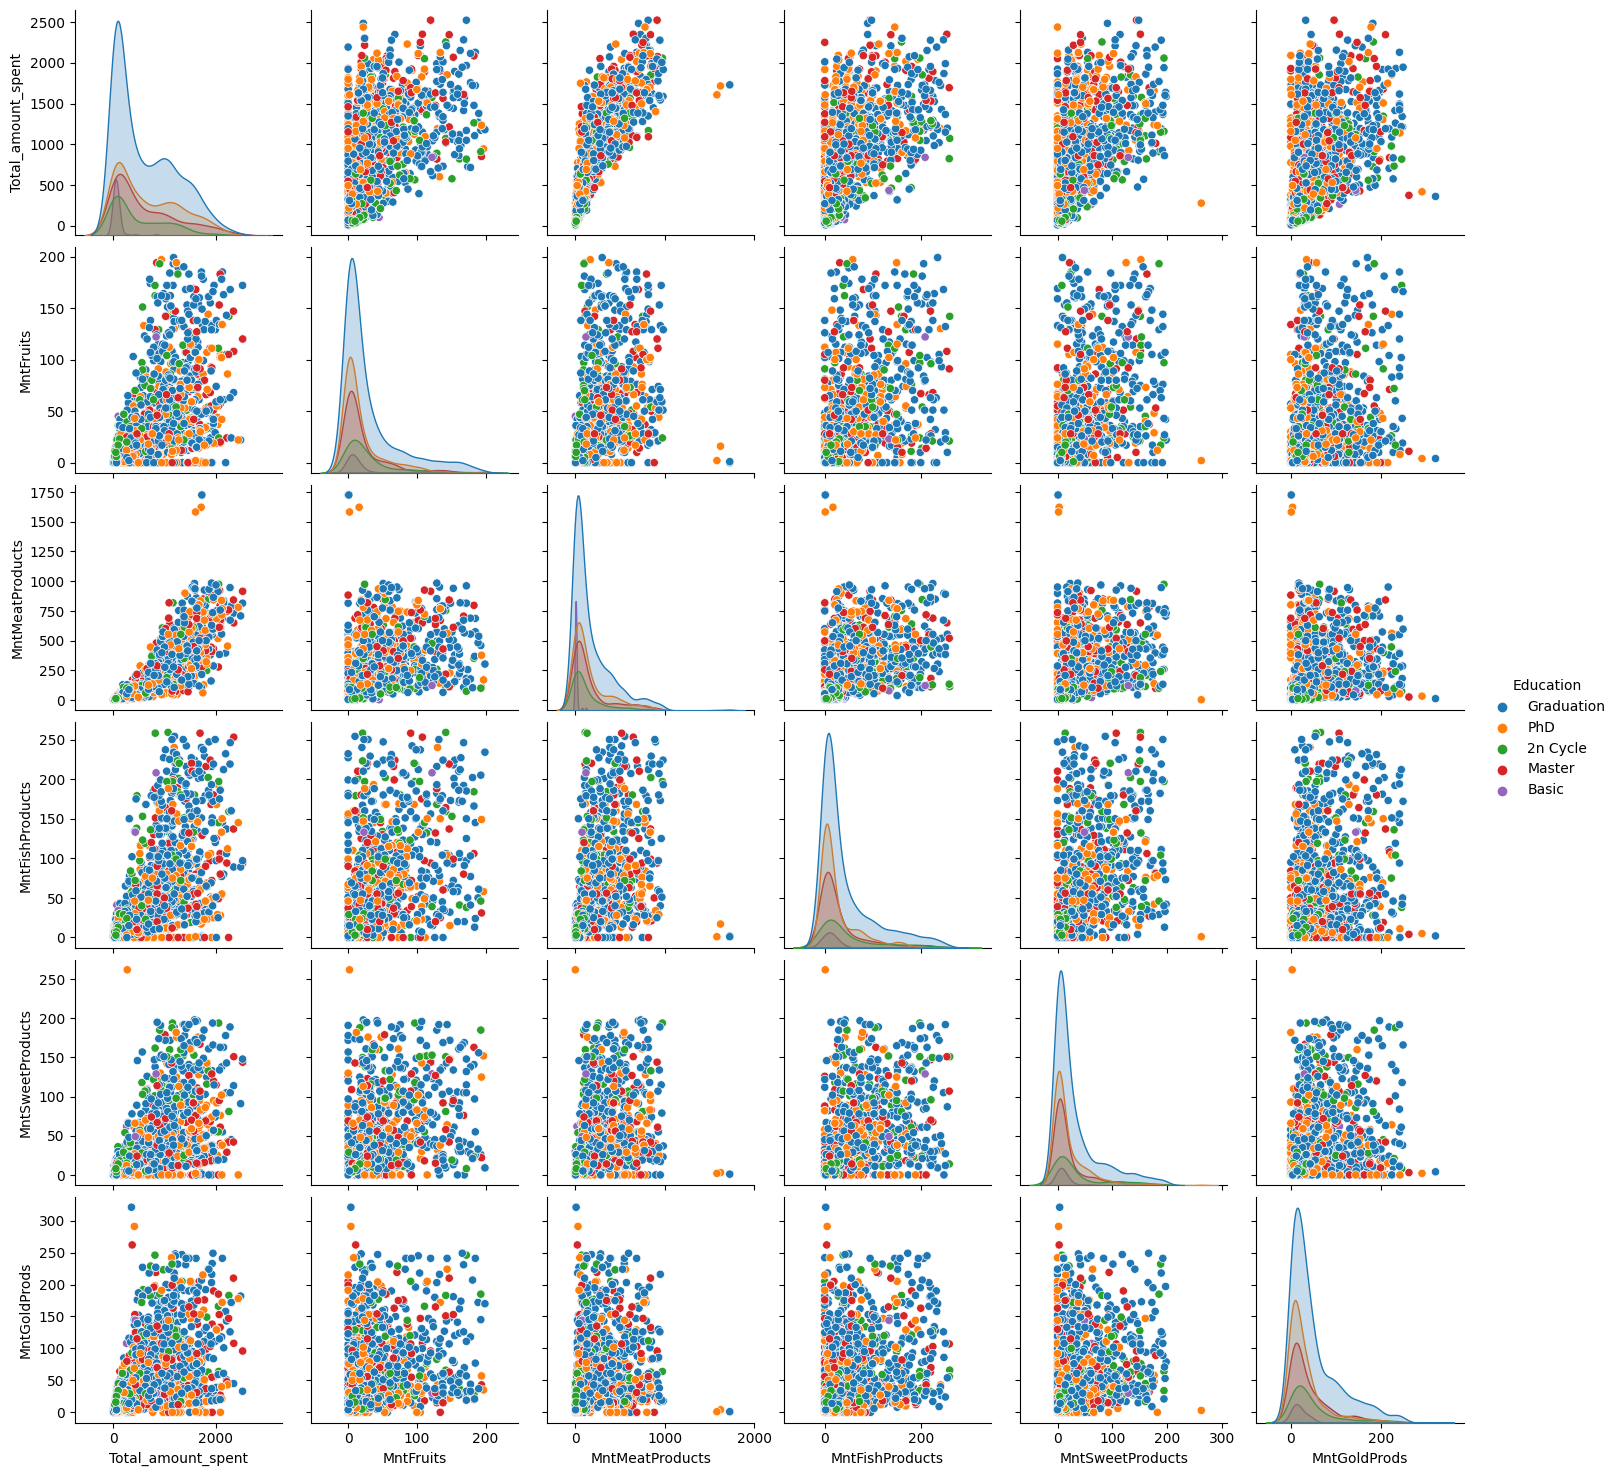

In [110]:
sns.pairplot(df,hue='Education',x_vars=['Total_amount_spent','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'],
                                y_vars=['Total_amount_spent','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'])

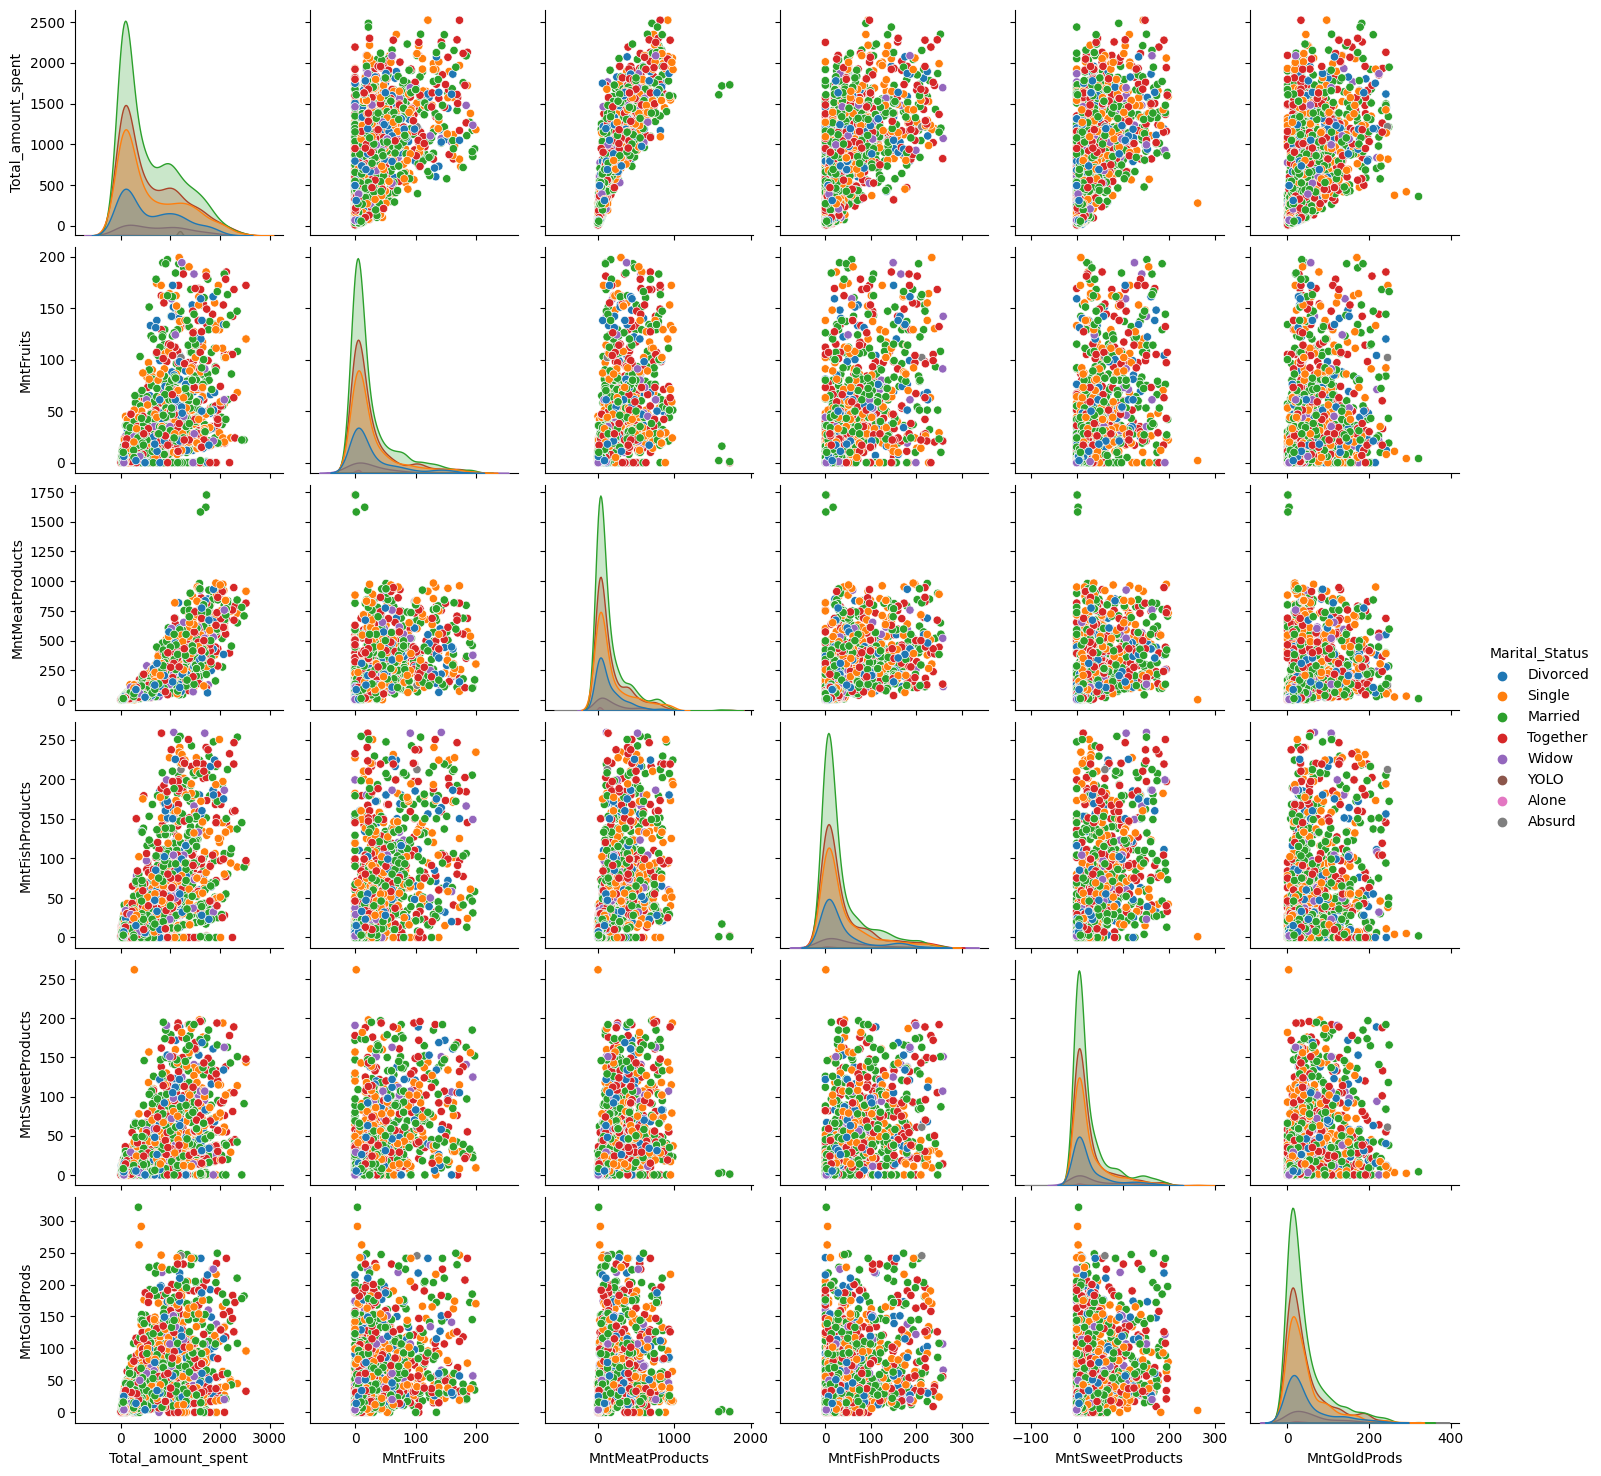

In [111]:
sns.pairplot(df,hue='Marital_Status',x_vars=['Total_amount_spent','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'],
                                y_vars=['Total_amount_spent','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'])

## Machine Learning: Model Building and Evaluation.

### 18. Create a copy of the dataset and drop the redundant columns from the dataset.

In [173]:
## lets make a copy of the dataset.
df1 = df.copy()

In [174]:
## Dropping redundant columns, dropping column Year_Birth also, beacuse we have created a new column 'age' out of it
df1.drop(['ID', 'Country','Dt_Customer', 'Year_Birth'], axis = 1, inplace = True)

In [175]:
df1.head(2)

Education Marital_Status   Income   Kidhome  Teenhome  Recency  MntWines  \
0  Graduation       Divorced   84835.0        0         0        0       189   
1  Graduation         Single   57091.0        0         0        0       464   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0        104              379              111               189   
1          5               64                7                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  6                  1             0             0   
1                  7                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Age  \
0             0             0             0         1         0   52   
1             0             0             1         1         0   61   

   Total_amount_spent  TotalPurchases  Dependents  
0                1190              15           0  
1                 577              18           0

### 19. Encode the categorical columns.

In [176]:
# making an instance of the label encoder class
le = LabelEncoder()
# label encoding all the categorical columns that have more than 2 unique values
df1['Education']=le.fit_transform(df1['Education'])
df1['Marital_Status']=le.fit_transform(df1['Marital_Status'])

In [177]:
df1.head(2)

Education  Marital_Status   Income   Kidhome  Teenhome  Recency  MntWines  \
0          2               2   84835.0        0         0        0       189   
1          2               4   57091.0        0         0        0       464   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0        104              379              111               189   
1          5               64                7                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  6                  1             0             0   
1                  7                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Age  \
0             0             0             0         1         0   52   
1             0             0             1         1         0   61   

   Total_amount_spent  TotalPurchases  Dependents  
0                1190              15           0  
1                 577              18           0

### 20. Segregate the dependent and independent features and store them in the variables X and Y

In [178]:
X = df1.drop('Response', axis=1)
y = df1['Response']

In [181]:
# Checking the count of records in the target column accepted the last campaign or not(0 and 1)
df1["Response"].value_counts()

0    1883
1     333
Name: Response, dtype: int64

### 21. Split the dataset into train and test dataset.

In [182]:
# train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1772, 27)
Shape of testing feature: (444, 27)
Shape of training label: (1772,)
Shape of training label: (444,)


### 22. Scale the independet variables, so that all the values are in the same scale

In [183]:
# declaring an object of standardscaler class
sc = StandardScaler()
# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)
# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

### 23. Build a logistic regression model and evaluate the model performance.

In [184]:
# Create an instance
log_reg = LogisticRegression()
#Learning
log_reg.fit(X_train,y_train)

LogisticRegression()

In [185]:
# Check for prediction results
y_pred = log_reg.predict(X_test)

In [186]:
# Check for accuray of the model
accuracy_score(y_test,y_pred)

0.8738738738738738

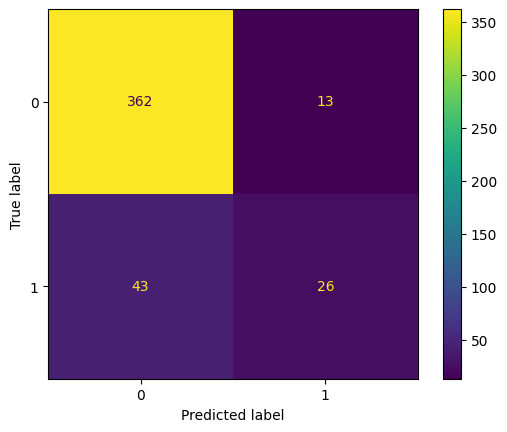

In [187]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()

In [188]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       375
           1       0.67      0.38      0.48        69

    accuracy                           0.87       444
   macro avg       0.78      0.67      0.70       444
weighted avg       0.86      0.87      0.86       444



- We see that accuracy is 0.87, but recall for class-1 is quite low due to class imbalance.

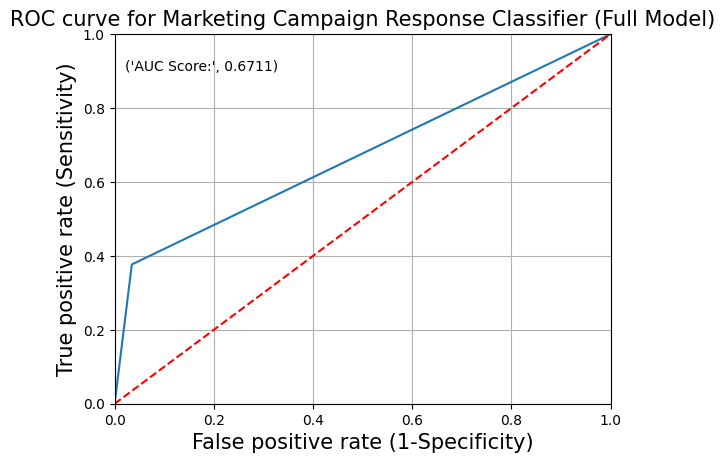

In [191]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Marketing Campaign Response Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)